In [ ]:
import pandas as pd

df = pd.read_csv("Sales-Export_2019-2020.csv")
df.head()


,country,order_value_EUR,cost,date,category,customer_name,sales_manager,sales_rep,device_type,order_id
0,Sweden,"17,524.02",14122.61,2/12/2020,Books,Goldner-Dibbert,Maxie Marrow,Madelon Bront,Mobile,70-0511466
1,Finland,"116,563.40",92807.78,9/26/2019,Games,Hilll-Vandervort,Hube Corey,Wat Bowkley,Mobile,28-6585323
2,Portugal,"296,465.56",257480.34,7/11/2019,Clothing,Larkin-Collier,Celine Tumasian,Smitty Culverhouse,PC,58-7703341
3,Portugal,"74,532.02",59752.32,4/2/2020,Beauty,Hessel-Stiedemann,Celine Tumasian,Aurelie Wren,PC,14-6700183
4,Spain,"178,763.42",146621.76,12/22/2019,Games,Johns and Sons,Emalia Dinse,Bertha Walbrook,Tablet,15-8765160


In [ ]:
df.shape


(1000, 10)

In [ ]:
df.columns


Index(['country', ' order_value_EUR ', ' cost ', 'date', 'category',
       'customer_name', 'sales_manager', 'sales_rep', 'device_type',
       'order_id'],
      dtype='object')

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            1000 non-null   object 
 1    order_value_EUR   1000 non-null   object 
 2    cost              1000 non-null   float64
 3   date               1000 non-null   object 
 4   category           1000 non-null   object 
 5   customer_name      1000 non-null   object 
 6   sales_manager      1000 non-null   object 
 7   sales_rep          1000 non-null   object 
 8   device_type        1000 non-null   object 
 9   order_id           1000 non-null   object 
dtypes: float64(1), object(9)
memory usage: 78.3+ KB


In [ ]:
df['date'] = pd.to_datetime(df['date'])


In [ ]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   country            1000 non-null   object        
 1    order_value_EUR   1000 non-null   object        
 2    cost              1000 non-null   float64       
 3   date               1000 non-null   datetime64[ns]
 4   category           1000 non-null   object        
 5   customer_name      1000 non-null   object        
 6   sales_manager      1000 non-null   object        
 7   sales_rep          1000 non-null   object        
 8   device_type        1000 non-null   object        
 9   order_id           1000 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(8)
memory usage: 78.3+ KB


In [ ]:
df.columns = df.columns.str.strip()


In [ ]:
df['order_value_EUR'] = df['order_value_EUR'].str.replace(',', '')
df['order_value_EUR'] = pd.to_numeric(df['order_value_EUR'])


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   country          1000 non-null   object        
 1   order_value_EUR  1000 non-null   float64       
 2   cost             1000 non-null   float64       
 3   date             1000 non-null   datetime64[ns]
 4   category         1000 non-null   object        
 5   customer_name    1000 non-null   object        
 6   sales_manager    1000 non-null   object        
 7   sales_rep        1000 non-null   object        
 8   device_type      1000 non-null   object        
 9   order_id         1000 non-null   object        
dtypes: datetime64[ns](1), float64(2), object(7)
memory usage: 78.3+ KB


In [ ]:
total_sales = df['order_value_EUR'].sum()
total_sales


np.float64(113361738.71)

In [ ]:
sales_by_country = df.groupby('country')['order_value_EUR'].sum().sort_values(ascending=False)
sales_by_country


,order_value_EUR
country,
Portugal,27796361.83
France,25900678.42
Sweden,19637204.45
UK,12115617.24
Finland,5548035.05
Ireland,4952284.71
Bulgaria,3482144.64
Netherlands,3224664.79
Luxembourg,2913550.40


In [ ]:
sales_by_category = df.groupby('category')['order_value_EUR'].sum().sort_values(ascending=False)
sales_by_category


,order_value_EUR
category,
Clothing,17661682.13
Games,15321623.45
Appliances,15139668.73
Electronics,14482077.62
Books,13179978.90
Beauty,12569063.88
Smartphones,11101654.66
Outdoors,5939075.44
Accessories,4703930.70


In [ ]:
df['month'] = df['date'].dt.to_period('M')


In [ ]:
monthly_sales = df.groupby('month')['order_value_EUR'].sum()
monthly_sales


,order_value_EUR
month,
2019-01,4516614.82
2019-02,2895563.90
2019-03,2521827.99
2019-04,4172236.77
2019-05,3825681.97
2019-06,7692234.90
2019-07,6638609.21
2019-08,3437450.14
2019-09,4870060.55


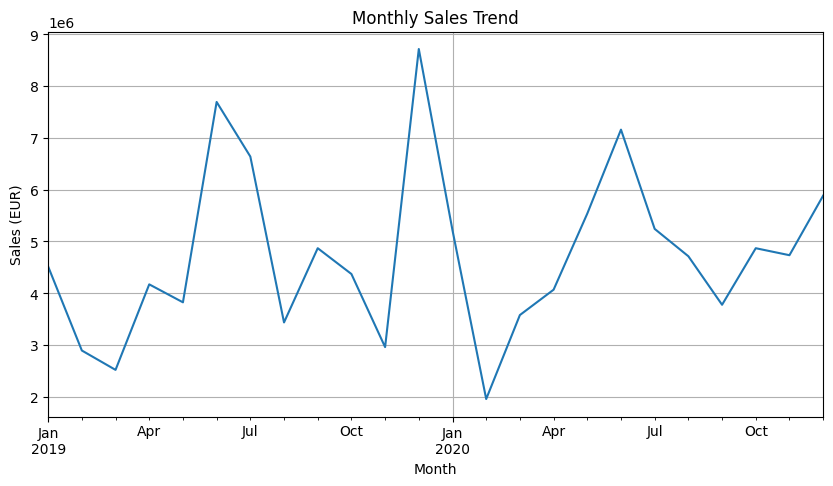

In [ ]:
import matplotlib.pyplot as plt

monthly_sales.plot(kind='line', figsize=(10,5))
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Sales (EUR)')
plt.grid(True)
plt.show()
